# <div align = 'center'>**K-Nearest Neighbors (KNN)**</div>

---

### **1. What is KNN?**
K-Nearest Neighbors (KNN) is a **supervised machine learning algorithm** used for both **classification** and **regression** tasks. It predicts the output for a new data point based on the **'k' nearest neighbors** in the training dataset.

KNN is:
- **Instance-based**: It does not explicitly learn a model but stores the training data and makes predictions based on proximity.
- **Non-parametric**: It does not assume any specific distribution for the data.

   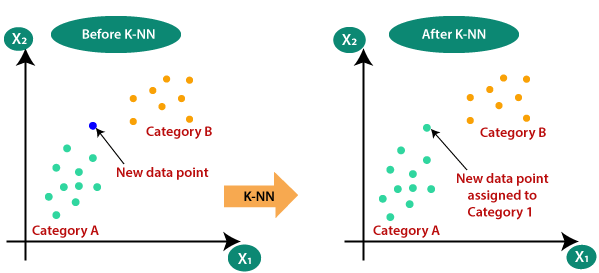

---

### **2. How KNN Works**
1. **Choose the Value of 'k'**:
   - Decide the number of nearest neighbors to consider (e.g., \( k = 3 \)).

2. **Calculate Distance**:
   - Compute the distance between the new data point and all points in the training dataset using a distance metric (e.g., Euclidean, Manhattan).

3. **Find Nearest Neighbors**:
   - Identify the \( k \) closest points to the new data point.

4. **Make Predictions**:
   - **For Classification**:
     - Assign the class label that is most common among the \( k \) neighbors (majority voting).
   - **For Regression**:
     - Predict the average (or weighted average) of the values of the \( k \) neighbors.

      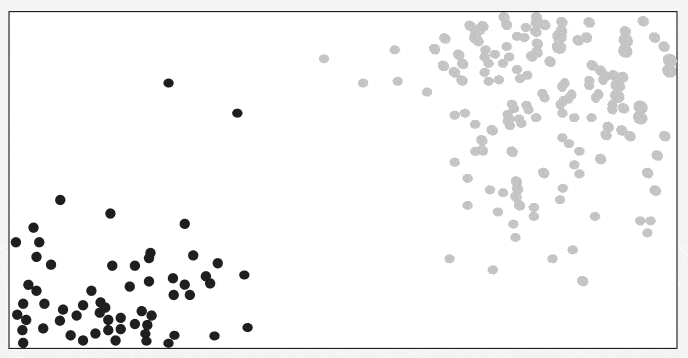

---

### **3. Key Features of KNN**
1. **Lazy Learning**:
   - KNN does not train a model; it simply stores the training data and performs computations during prediction.

2. **Non-Parametric**:
   - KNN does not assume any specific form for the underlying data distribution.

3. **Distance-Based**:
   - Predictions are based on the proximity of data points.

---

### **4. Choosing the Value of 'k'**
- **Small $ k $**:
  - Sensitive to noise and may lead to overfitting.
  - Creates complex decision boundaries.
- **Large $ k $**:
  - Smoothens decision boundaries but may lead to underfitting.

---

### **5. Distance Metrics Used in KNN**
1. **Euclidean Distance**:
   - Straight-line distance between two points.
   $$
   d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
   $$
Let me know if you need further clarification or assistance!2. 
2. **Manhattan Distance**:
   - Sum of absolute differences between coordinates.
   $$
   d(p, q) = \sum_{i=1}^{n} |p_i - q_i|
   $$

3. **Minkowski Distance**:
   - Generalized distance metric.
   $$
   d(p, q) = \left( \sum_{i=1}^{n} |p_i - q_i|^p \right)^{1/p}
   $$
   - Special cases:
     - $ p = 2 $: Euclidean Distance.
     - $ p = 1 $: Manhattan Distance.

---

### **6. Applications of KNN**
1. **Classification**:
   - Handwritten digit recognition (e.g., MNIST dataset).
   - Spam email detection.
   - Disease diagnosis (e.g., cancer detection).

2. **Regression**:
   - Predicting house prices.
   - Estimating stock prices.

3. **Recommendation Systems**:
   - Suggesting products or movies based on user preferences.

---

### **7. Advantages**
1. **Simplicity**:
   - Easy to understand and implement.
2. **No Training Phase**:
   - No explicit model training is required.
3. **Versatility**:
   - Can be used for both classification and regression tasks.

---

### **8. Disadvantages**
1. **Computationally Expensive**:
   - Requires calculating distances for all training points during prediction.
2. **Memory Intensive**:
   - Stores the entire training dataset.
3. **Sensitive to Irrelevant Features**:
   - Performance can degrade if irrelevant features are included.
4. **Imbalanced Data**:
   - May perform poorly if one class dominates the dataset.

---

### **9. Python Implementation**

#### **9.1 Import Required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### **9.2 Load the Dataset**

In [2]:
iris = load_iris()
X = iris.data  
y = iris.target


print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Shape of X: (150, 4)
Shape of y: (150,)


#### **9.3 Visualize the Data**

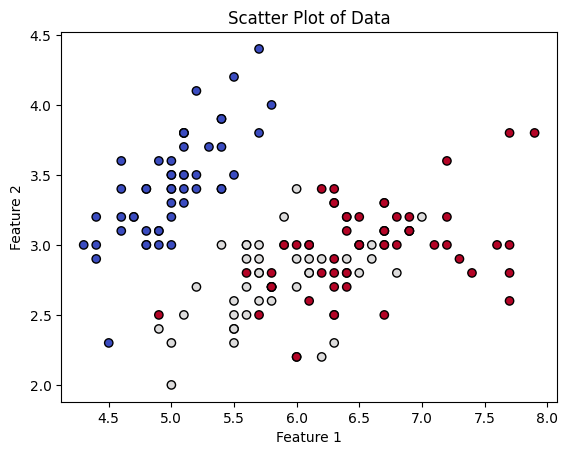

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Data")
plt.show()

#### **9.4 Split the Data into Training and Testing Sets**


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (120, 4)
Testing Set Size: (30, 4)


#### **9.5 Train the KNN Model**

In [5]:
k = 5 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### **9.6 Make Predictions**

In [6]:
y_pred = knn.predict(X_test)

#### **9.7 Evaluate the Model**

In [9]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0000

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### **3.8 Visualize the Decision Boundary**


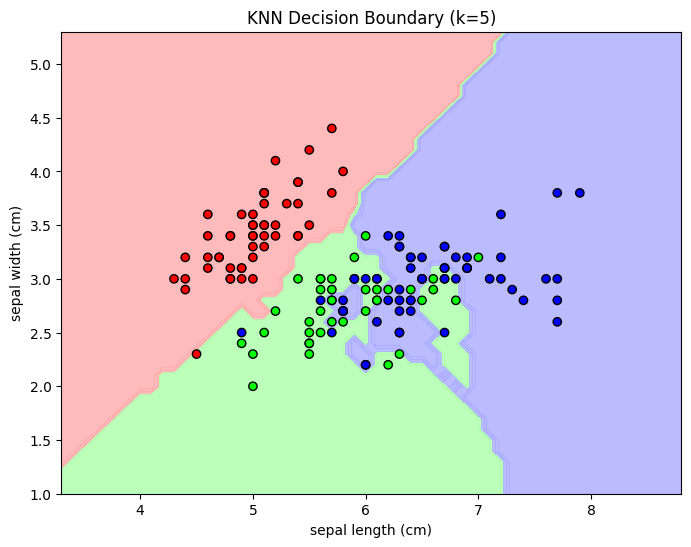

In [8]:
from matplotlib.colors import ListedColormap

X_vis = X[:, :2]  
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=k)
knn_vis.fit(X_train_vis, y_train_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"KNN Decision Boundary (k={k})")
plt.show()

### **5. Summary**
- KNN is a simple and effective algorithm for classification and regression tasks.
- It works by finding the \( k \) nearest neighbors and making predictions based on their labels or values.
- While it is easy to implement, KNN can be computationally expensive for large datasets.

**Visualization**:
   - A scatter plot of the data points with the decision boundary separating the two classes.